In [1]:
import numpy as np
import matplotlib.pyplot as plt

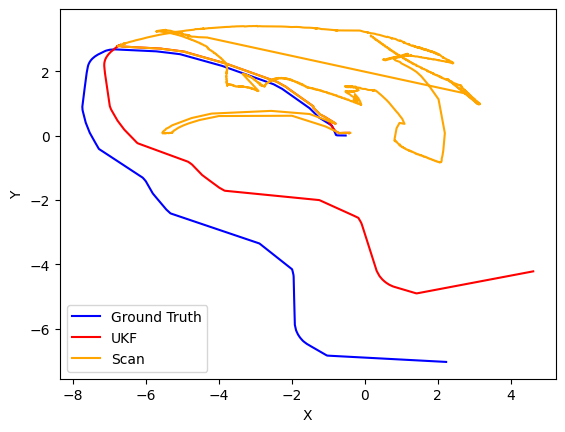

In [2]:
data = np.load("./data/sim/data.npz")
scan_pose = np.load("./results/turtle_scan_pose.npy")
ekf = np.load("./results/turtle_ekf.npy")
length = len(ekf)
ground_truth = data["ground_truth"]
time_gt = data["ground_truth_t"]
odom = data["odom"]
odom_t = data["odom_t"]
odom_ = []
for t in time_gt:
    idx = np.argmin(np.abs(odom_t - t))
    odom_.append(odom[idx])
odom = np.array(odom_)
plt.plot(ground_truth[:, 0], ground_truth[:, 1], label="Ground Truth", color="blue")
plt.plot(ekf[:, 0], ekf[:, 1], label="UKF", color="red")
# plt.plot(odom[:, 0], odom[:, 1], label="Odom", color="green")
plt.plot(scan_pose[:, 0], scan_pose[:, 1], label="Scan", color="orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()